In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/Data/groceries_.xlsx'

In [ ]:
df_raw = pd.read_excel(path, header=None)
df_raw

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,trái cây họ cam quýt,bánh mì bán thành phẩm,bơ thực vật,súp sẵn sàng,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,trái cây nhiệt đới,sữa chua,cà phê,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sữa nguyên chất,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,trái cây pip,sữa chua,kem phô mai,thịt lây lan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,các loại rau khác,sữa nguyên chất,sữa đặc,sản phẩm bánh lâu đời,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,lạp xưởng,thịt gà,thịt bò,thịt hamburger,trái cây họ cam quýt,quả nho,rễ rau,sữa nguyên chất,bơ,kem đánh bông/chua,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,nấu sô cô la nấu ăn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,thịt gà,trái cây họ cam quýt,các loại rau khác,bơ,sữa chua,món tráng miệng đông lạnh,trứng trong nước,cuộn/bánh,rum,bám làm phim/túi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,bánh mì bán thành phẩm,nước đóng chai,nước ngọt,chia bia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
df_raw = df_raw.astype(str)

te = TransactionEncoder().fit(np.array(df_raw))
data = te.transform(np.array(df_raw))

data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
from mlxtend.frequent_patterns import apriori

df = pd.DataFrame(data, columns=te.columns_)
df = df.drop('nan', axis=1)
df.head()

,artif. chất làm ngọt,bia đóng hộp,bài viết vệ sinh,bám làm phim/túi,bánh mì bán thành phẩm,bánh mì nâu,bánh mì trắng,bánh ngọt,bánh quế,báo,...,xịt tóc,zwieback,đông lại,đĩa,đường,đất hoa/phân bón,đồ uống,đồ uống ca cao,đồ ăn nhẹ,ảnh/phim
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Apply Apriori**

In [ ]:
frequent_itemsets = apriori(df, min_support=1/1000, use_colnames=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

In [ ]:
rules = rules[rules['lift']>20]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3975,"(giăm bông, bánh mì trắng)",(phô mai chế biến),0.005084,0.016573,0.001932,0.380000,22.928221,0.001848,1.586172
3977,(phô mai chế biến),"(giăm bông, bánh mì trắng)",0.016573,0.005084,0.001932,0.116564,22.928221,0.001848,1.126190
8893,"(chia bia, rượu)",(red/blush wine),0.004677,0.019217,0.001932,0.413043,21.493559,0.001842,1.670963
8894,"(chia bia, red/blush wine)",(rượu),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828
8896,(rượu),"(chia bia, red/blush wine)",0.011083,0.004881,0.001932,0.174312,35.715787,0.001878,1.205200
...,...,...,...,...,...,...,...,...,...
43576,"(trái cây nhiệt đới, dầu, sữa nguyên chất)","(các loại rau khác, rễ rau, sữa chua)",0.002542,0.012913,0.001017,0.400000,30.976378,0.000984,1.645145
43577,"(rễ rau, dầu, sữa chua)","(các loại rau khác, trái cây nhiệt đới, sữa ng...",0.001932,0.017082,0.001017,0.526316,30.811404,0.000984,2.075049
43578,"(dầu, sữa chua, sữa nguyên chất)","(các loại rau khác, trái cây nhiệt đới, rễ rau)",0.003152,0.012303,0.001017,0.322581,26.219675,0.000978,1.458029
43581,"(trái cây nhiệt đới, dầu)","(các loại rau khác, rễ rau, sữa chua, sữa nguy...",0.004677,0.007829,0.001017,0.217391,27.766798,0.000980,1.267774


**Apply ECLAT**

In [ ]:
import sys
from collections import defaultdict
import random

In [ ]:
def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())
 
class IntersectAll:
    def __and__(self, other):
        return other
IntersectAll = IntersectAll()

def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist
             
            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))
             
            # recurse, with l as prefix
            recurse(new_items, l)
     
    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}

In [ ]:
from numpy.lib.shape_base import tile
import math

arr_raw = np.array(df_raw)
arr = []
for sub_arr in arr_raw:
  sub_arr = list(sub_arr)
  if 'nan' in sub_arr:
    nan_loc = sub_arr.index('nan')
    arr.append(np.array(sub_arr[0:nan_loc]))
  else:
    arr.append(np.array(sub_arr))

tl = tidlists(np.array(arr, dtype=object))
for i in range(0, len(tl)):
  if type(tl[i][0]) == float:
    if math.isnan(tl[i][0]):
      del tl[i]
      break

In [ ]:
result = eclat(tl, minsup=250, minlen=2)
result

{('trứng trong nước', 'sữa nguyên chất'): 295,
 ('kem đánh bông/chua', 'các loại rau khác'): 284,
 ('kem đánh bông/chua', 'sữa nguyên chất'): 317,
 ('lạp xưởng', 'cuộn/bánh'): 301,
 ('lạp xưởng', 'các loại rau khác'): 265,
 ('lạp xưởng', 'sữa nguyên chất'): 294,
 ('rễ rau', 'các loại rau khác'): 466,
 ('rễ rau', 'sữa nguyên chất'): 481,
 ('rễ rau', 'sữa chua'): 254,
 ('bánh ngọt', 'sữa nguyên chất'): 327,
 ('báo', 'sữa nguyên chất'): 269,
 ('trái cây/nước trái cây', 'sữa nguyên chất'): 262,
 ('nước ngọt', 'nước đóng chai'): 285,
 ('nước ngọt', 'cuộn/bánh'): 377,
 ('nước ngọt', 'các loại rau khác'): 322,
 ('nước ngọt', 'sữa nguyên chất'): 394,
 ('nước ngọt', 'sữa chua'): 269,
 ('đông lại', 'sữa nguyên chất'): 257,
 ('nước đóng chai', 'sữa nguyên chất'): 338,
 ('cuộn/bánh', 'các loại rau khác'): 419,
 ('cuộn/bánh', 'sữa nguyên chất'): 557,
 ('cuộn/bánh', 'sữa chua'): 338,
 ('bơ', 'sữa nguyên chất'): 271,
 ('các loại rau khác', 'trái cây pip'): 257,
 ('các loại rau khác', 'sữa nguyên chất

In [ ]:
itemsets = list(result.keys())
itemsets

[('trứng trong nước', 'sữa nguyên chất'),
 ('kem đánh bông/chua', 'các loại rau khác'),
 ('kem đánh bông/chua', 'sữa nguyên chất'),
 ('lạp xưởng', 'cuộn/bánh'),
 ('lạp xưởng', 'các loại rau khác'),
 ('lạp xưởng', 'sữa nguyên chất'),
 ('rễ rau', 'các loại rau khác'),
 ('rễ rau', 'sữa nguyên chất'),
 ('rễ rau', 'sữa chua'),
 ('bánh ngọt', 'sữa nguyên chất'),
 ('báo', 'sữa nguyên chất'),
 ('trái cây/nước trái cây', 'sữa nguyên chất'),
 ('nước ngọt', 'nước đóng chai'),
 ('nước ngọt', 'cuộn/bánh'),
 ('nước ngọt', 'các loại rau khác'),
 ('nước ngọt', 'sữa nguyên chất'),
 ('nước ngọt', 'sữa chua'),
 ('đông lại', 'sữa nguyên chất'),
 ('nước đóng chai', 'sữa nguyên chất'),
 ('cuộn/bánh', 'các loại rau khác'),
 ('cuộn/bánh', 'sữa nguyên chất'),
 ('cuộn/bánh', 'sữa chua'),
 ('bơ', 'sữa nguyên chất'),
 ('các loại rau khác', 'trái cây pip'),
 ('các loại rau khác', 'sữa nguyên chất'),
 ('các loại rau khác', 'sữa chua'),
 ('các loại rau khác', 'trái cây nhiệt đới'),
 ('các loại rau khác', 'trái cây h

In [ ]:
#calculate support
support = {}
for items in itemsets:
  trans = list(set(list(df[df[items[0]]==True].index)) & set(list(df[df[items[1]]==True].index)))
  sup = len(trans)/df.shape[0]
  support[items] = sup
support

{('trứng trong nước', 'sữa nguyên chất'): 0.029994916115912557,
 ('kem đánh bông/chua', 'các loại rau khác'): 0.02887646161667514,
 ('kem đánh bông/chua', 'sữa nguyên chất'): 0.032231825114387394,
 ('lạp xưởng', 'cuộn/bánh'): 0.030604982206405694,
 ('lạp xưởng', 'các loại rau khác'): 0.026944585663446874,
 ('lạp xưởng', 'sữa nguyên chất'): 0.0298932384341637,
 ('rễ rau', 'các loại rau khác'): 0.047381799694966954,
 ('rễ rau', 'sữa nguyên chất'): 0.048906964921199794,
 ('rễ rau', 'sữa chua'): 0.025826131164209457,
 ('bánh ngọt', 'sữa nguyên chất'): 0.033248601931875954,
 ('báo', 'sữa nguyên chất'): 0.027351296390442297,
 ('trái cây/nước trái cây', 'sữa nguyên chất'): 0.026639552618200304,
 ('nước ngọt', 'nước đóng chai'): 0.028978139298423997,
 ('nước ngọt', 'cuộn/bánh'): 0.03833248601931876,
 ('nước ngọt', 'các loại rau khác'): 0.032740213523131674,
 ('nước ngọt', 'sữa nguyên chất'): 0.040061006609049314,
 ('nước ngọt', 'sữa chua'): 0.027351296390442297,
 ('đông lại', 'sữa nguyên chất'

In [ ]:
#calculate confidence
confidence = {}
for items in itemsets:
  trans_both = set()
  trans = []
  conf = []
  trans_both = list(set(list(df[df[items[0]]==True].index)) & set(list(df[df[items[1]]==True].index)))
  for item in items:
    trans = list(df[df[item]==True].index)
    conf.append(len(trans_both)/len(trans))
  confidence[items] = conf

confidence_a_b = {}
confidence_b_a = {}
for key in confidence.keys():
  confidence_a_b[key] = confidence[key][0]
  confidence_b_a[key] = confidence[key][1]

confidence

{('trứng trong nước', 'sữa nguyên chất'): [0.47275641025641024,
  0.11738957421408674],
 ('kem đánh bông/chua', 'các loại rau khác'): [0.40283687943262414,
  0.14923804519180242],
 ('kem đánh bông/chua', 'sữa nguyên chất'): [0.44964539007092197,
  0.12614405093513728],
 ('lạp xưởng', 'cuộn/bánh'): [0.32575757575757575, 0.1663902708678828],
 ('lạp xưởng', 'các loại rau khác'): [0.28679653679653677,
  0.13925380977404098],
 ('lạp xưởng', 'sữa nguyên chất'): [0.3181818181818182, 0.116991643454039],
 ('rễ rau', 'các loại rau khác'): [0.43470149253731344, 0.24487651077246453],
 ('rễ rau', 'sữa nguyên chất'): [0.44869402985074625, 0.19140469558296858],
 ('rễ rau', 'sữa chua'): [0.23694029850746268, 0.18513119533527697],
 ('bánh ngọt', 'sữa nguyên chất'): [0.3737142857142857, 0.1301233585356148],
 ('báo', 'sữa nguyên chất'): [0.34267515923566877, 0.1070433744528452],
 ('trái cây/nước trái cây', 'sữa nguyên chất'): [0.36849507735583686,
  0.10425785913251094],
 ('nước ngọt', 'nước đóng chai'):

In [ ]:
#calculate lift
lift = {}
for items in itemsets:
  con = confidence[items][0]
  sup = len(list(df[df[items[1]]==True].index))/df.shape[0]
  lift[items] = con/sup

lift

{('trứng trong nước', 'sữa nguyên chất'): 1.8502026640954214,
 ('kem đánh bông/chua', 'các loại rau khác'): 2.081923651718265,
 ('kem đánh bông/chua', 'sữa nguyên chất'): 1.7597542424781207,
 ('lạp xưởng', 'cuộn/bánh'): 1.7710479588589039,
 ('lạp xưởng', 'các loại rau khác'): 1.4822091116100573,
 ('lạp xưởng', 'sữa nguyên chất'): 1.2452519625221574,
 ('rễ rau', 'các loại rau khác'): 2.2466049285887952,
 ('rễ rau', 'sữa nguyên chất'): 1.7560309524799398,
 ('rễ rau', 'sữa chua'): 1.6984750989948216,
 ('bánh ngọt', 'sữa nguyên chất'): 1.4625865499403103,
 ('báo', 'sữa nguyên chất'): 1.3411103028582578,
 ('trái cây/nước trái cây', 'sữa nguyên chất'): 1.4421604002366317,
 ('nước ngọt', 'nước đóng chai'): 1.5035765916302124,
 ('nước ngọt', 'cuộn/bánh'): 1.1951241524802292,
 ('nước ngọt', 'các loại rau khác'): 0.9703475715036408,
 ('nước ngọt', 'sữa nguyên chất'): 0.8991123707740158,
 ('nước ngọt', 'sữa chua'): 1.1243678229309215,
 ('đông lại', 'sữa nguyên chất'): 1.9194805332879712,
 ('nước 

In [ ]:
df_2 = pd.DataFrame(index=itemsets)
df_2['support'] = df_2.index.map(support)
df_2['confidence a --> b'] = df_2.index.map(confidence_a_b)
df_2['confidence b --> a'] = df_2.index.map(confidence_b_a)
df_2['lift'] = df_2.index.map(lift)
print(df_2[df_2['lift']>1.5].shape)
print(np.min(df_2['confidence a --> b']))

(19, 4)
0.1193792280143255


**--> Apriori performed better**

**Visualizing results from Apriori**

In [ ]:
list_title = []
for i in range(0, rules.shape[0]):
  list_title.append(str(list(rules['antecedents'].iloc[i])) + ' --> ' + str(list(rules['consequents'].iloc[i])))

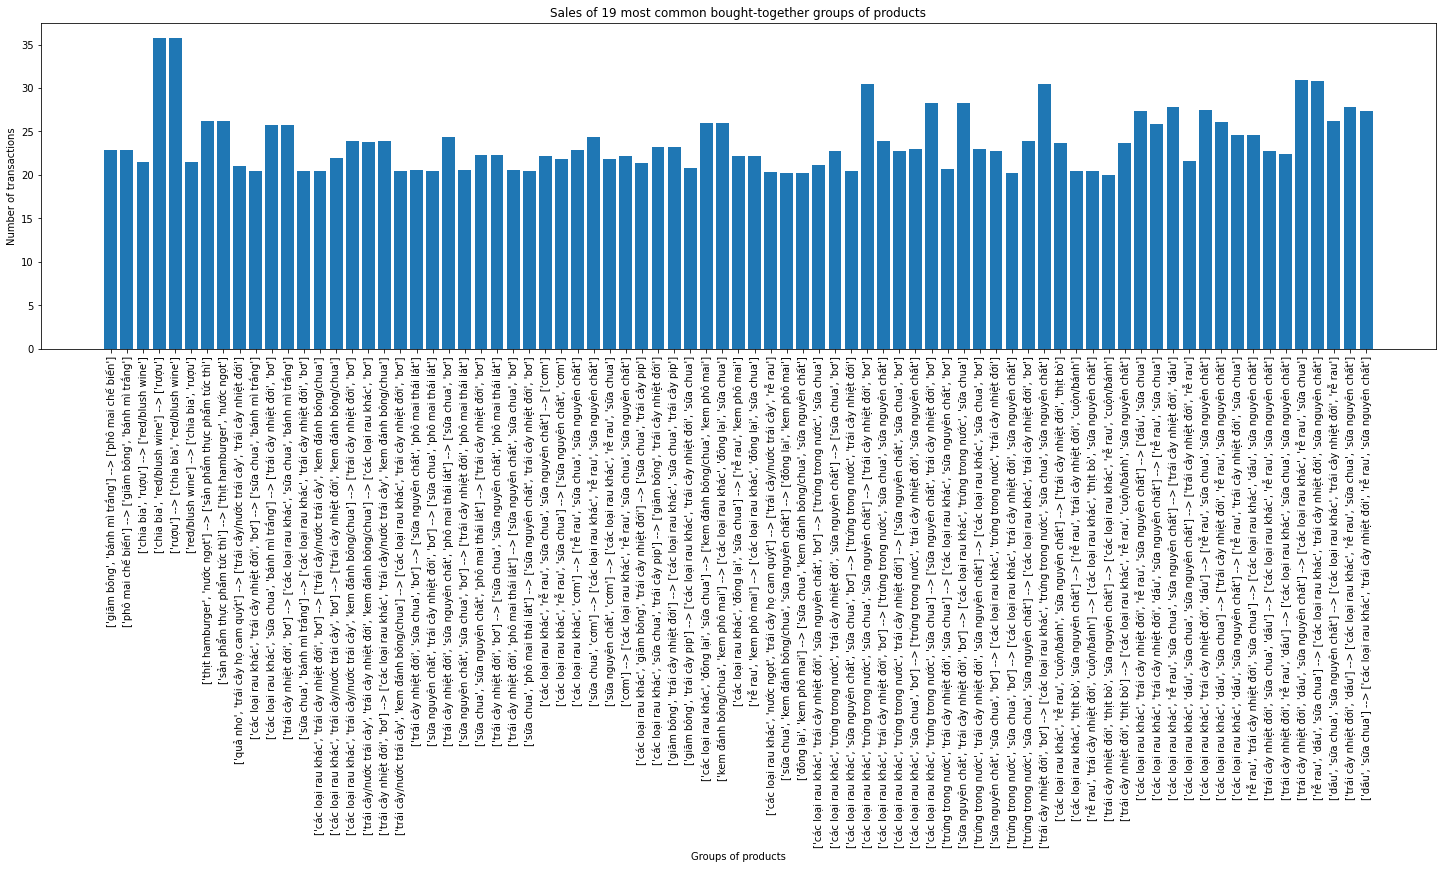

In [ ]:
#items pairs having highest lift
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
plt.bar(list_title, rules['lift'])
plt.title('Sales of 19 most common bought-together groups of products')
plt.xticks(rotation=90)
plt.xlabel('Groups of products')
plt.ylabel('Number of transactions')
plt.savefig("Fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()

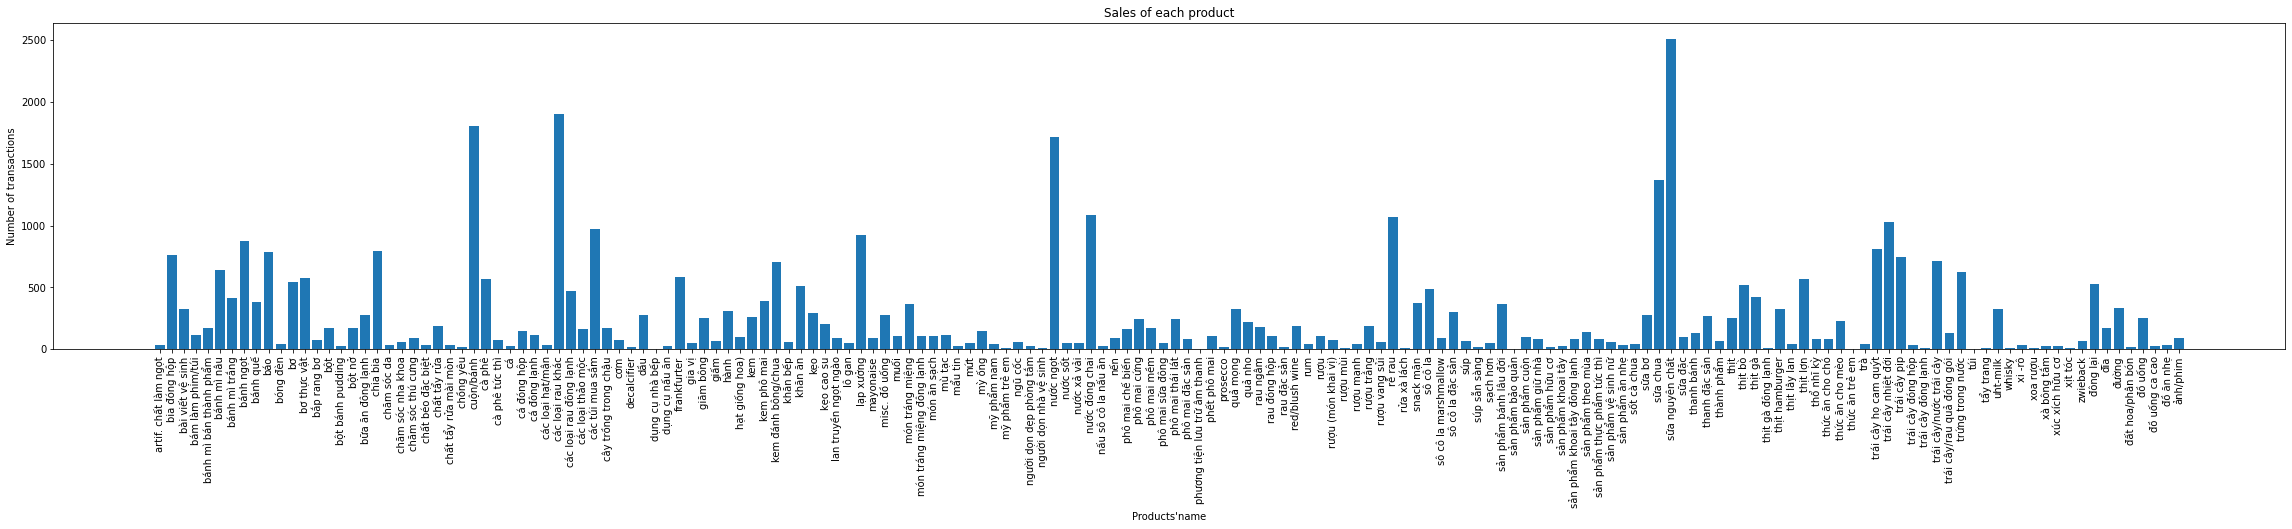

In [ ]:
#number of transactions of each product
number_of_transaction = {}

for product in df.keys():
  number_of_transaction[product] = len(list(df[df[product]==True].index))

plt.figure(figsize=(40, 6))
plt.bar(number_of_transaction.keys(), number_of_transaction.values())
plt.title("Sales of each product")
plt.xticks(rotation=90)
plt.xlabel("Products'name")
plt.ylabel("Number of transactions")
plt.savefig("Fig2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
df_trans = pd.DataFrame(index=number_of_transaction.keys())
df_trans['num_trans'] = df_trans.index.map(number_of_transaction)

**15 products sold the least**

                              num_trans
phương tiện lưu trữ âm thanh          1
thức ăn trẻ em                        1
sản phẩm bảo quản                     2
dụng cụ nhà bếp                       4
túi                                   4
thịt gà đông lạnh                     6
mỹ phẩm trẻ em                        6
người dọn nhà vệ sinh                 7
rửa xà lách                           8
whisky                                8
tẩy trang                             8
rượu mùi                              9
xoa rượu                             10
xịt tóc                              11
trái cây đông lạnh                   12



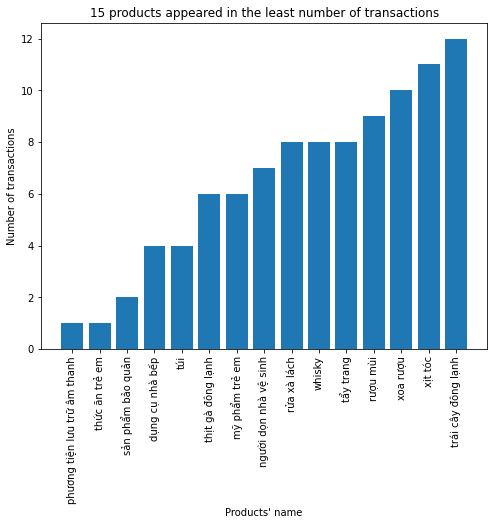

In [ ]:
print(df_trans.sort_values('num_trans').head(15))
print()
plt.figure(figsize=(8,6))
plt.bar(df_trans.sort_values('num_trans').head(15).index, df_trans.sort_values('num_trans').head(15)['num_trans'])
plt.title("15 products appeared in the least number of transactions")
plt.xticks(rotation=90)
plt.xlabel("Products' name")
plt.ylabel("Number of transactions")
plt.savefig("Fig3.pdf", format="pdf", bbox_inches="tight")
plt.show()

**15 products sold the most**

                      num_trans
bia đóng hộp                764
báo                         785
chia bia                    792
trái cây họ cam quýt        814
bánh ngọt                   875
lạp xưởng                   924
các túi mua sắm             969
trái cây nhiệt đới         1032
rễ rau                     1072
nước đóng chai             1087
sữa chua                   1372
nước ngọt                  1715
cuộn/bánh                  1809
các loại rau khác          1903
sữa nguyên chất            2513



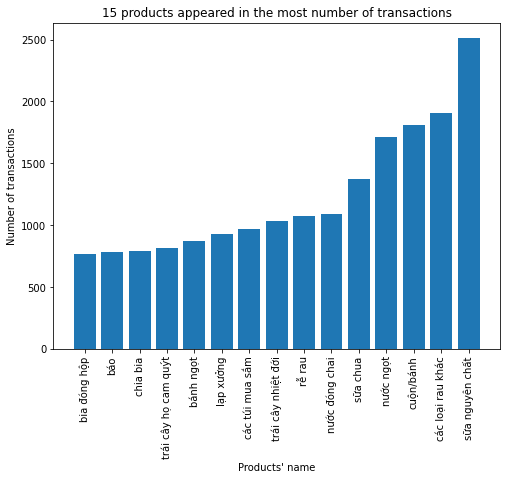

In [ ]:
print(df_trans.sort_values('num_trans').tail(15))
print()
plt.figure(figsize=(8,6))
plt.bar(df_trans.sort_values('num_trans').tail(15).index, df_trans.sort_values('num_trans').tail(15)['num_trans'])
plt.title("15 products appeared in the most number of transactions")
plt.xticks(rotation=90)
plt.xlabel("Products' name")
plt.ylabel("Number of transactions")
plt.savefig("Fig4.pdf", format="pdf", bbox_inches="tight")
plt.show()